# Seattle Airbnb Analysis
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

6 steps of CRISP-DM (Cross-Industry Standard Process for Data Mining):
1. Business Understanding
1. Data Understanding
1. Data Preparation
1. Modelling
1. Evaluation
1. Deployment



# 1. Business Understanding
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

In this project, we will use the datasets available on Kaggle: https://www.kaggle.com/datasets/airbnb/seattle
Let's answer 3 business questions:
1. Where is the busiest in Seattle?
1. What is the distribution of properties in the city limits?
1. What are the main factors that affect booking prices?.

# 2. Data Understanding
The **Seatlle Airbnb Open** Dataset catalogues homestay listings in Seattle, Washington from 01-2016 to 01-2017.


There are 3 subsets in the dataset:
1. The pricing for each listing id for a certain day is described in **calendar.csv**.
1. **listings.csv** contains a detailed description of each listing id, as well as review scores.
1. For each individual listing id, **reviews.csv** gives detailed reviews.

First, let's import the data & revelant libraries needed for the analysis.

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
pd.options.mode.chained_assignment = None

C:\Users\Vagner Belfort\AppData\Roaming\Python\Python39\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: ardet is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Users\Vagner Belfort\AppData\Roaming\Python\Python39\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: rkupsafe is an invalid version and will not be supported in a future release
  warnings.warn(


In [4]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')

In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [8]:
print('The listings.csv subset has {} columns and {} rows.'.format(listings.shape[1], listings.shape[0]))

The listings.csv subset has 92 columns and 3818 rows.


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [10]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# 3. Prepare Data

Having a glance at the **calendar.csv**.
There are 4 columns.

The **listing_id** and **price** columns are currently NOT in the correct datatype. We need to convert the data type of **listing_id** column into string and **price**'s into float.

We are going to extract **month** and **month_year** from the **date** column as well.

In [13]:
# listing_id
calendar['listing_id'] = calendar['listing_id'].astype(str)

# month, year and month_year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')

# price
calendar['price'] = calendar['price'].apply(lambda x: float((x[1:].replace(',',''))) if type(x) != float else x)

calendar.head()

,listing_id,date,available,price,month,year,month_year
0,241032,2016-01-04,t,85.0,1,2016,2016-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01
2,241032,2016-01-06,f,NaN,1,2016,2016-01
3,241032,2016-01-07,f,NaN,1,2016,2016-01
4,241032,2016-01-08,f,NaN,1,2016,2016-01


# 4. Modeling & Evaluation

## Question 1. Where are more Airbnb properties in Settle????

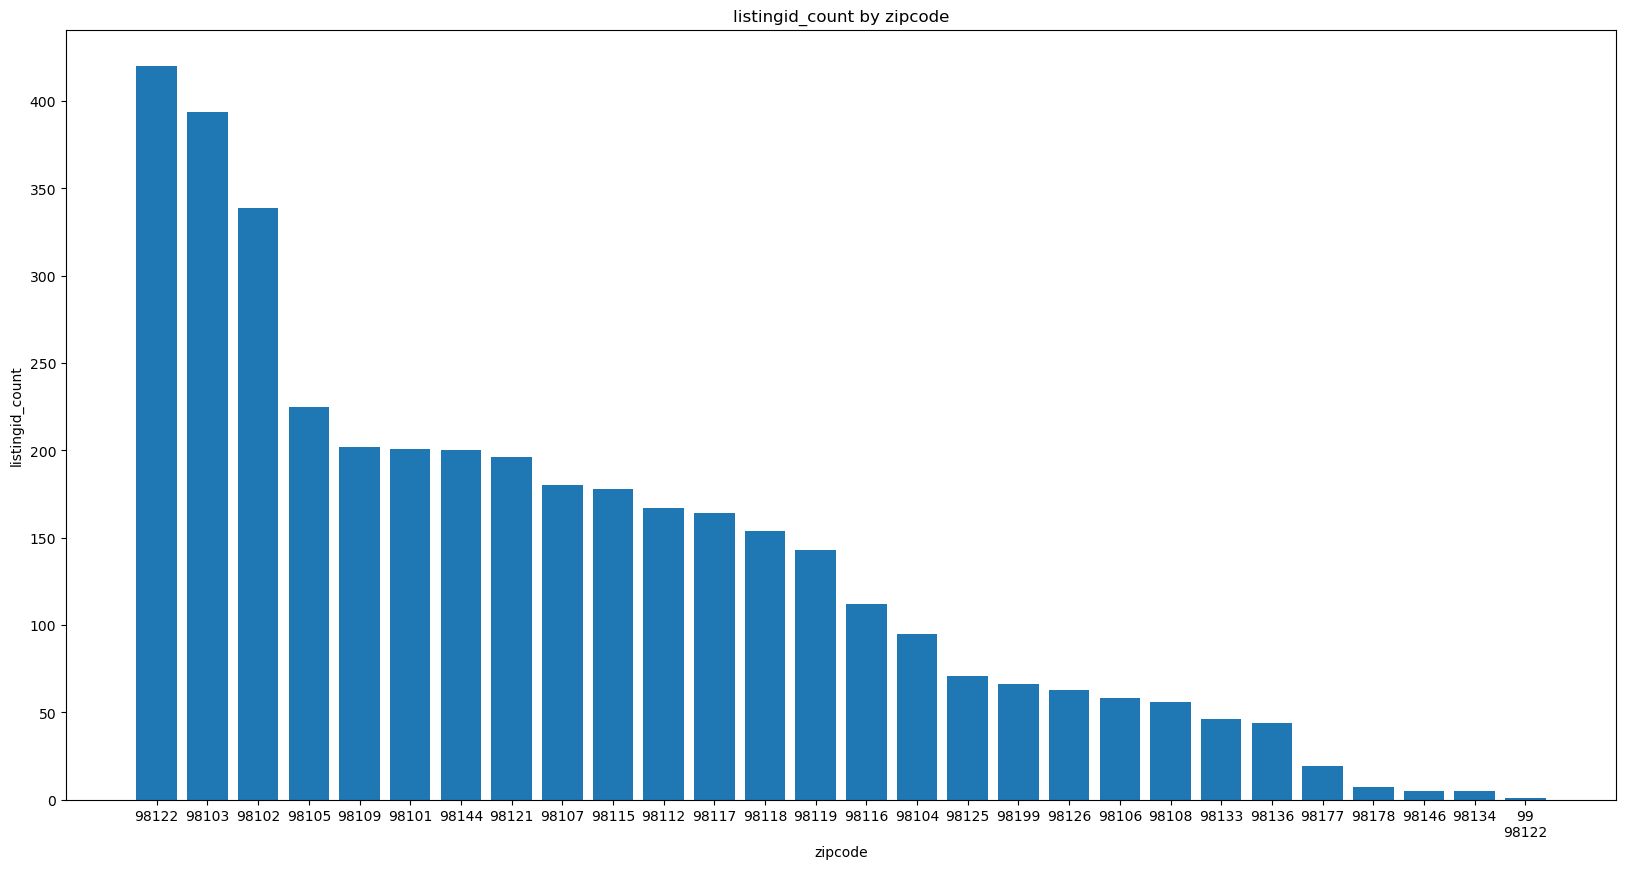

In [14]:
zip = listings['zipcode'].value_counts()
zip = zip.to_frame().reset_index()
zip = zip.rename({'index':'zipcode', 'zipcode':'listingid_count'}, axis=1)
zip['zipcode'].astype('str')


plt.figure(figsize = (20,10))
plt.bar(zip['zipcode'], zip['listingid_count'])
plt.xlabel('zipcode')
plt.xticks(zip['zipcode'])
plt.ylabel('listingid_count')
plt.title('listingid_count by zipcode')
plt.show()

In [15]:
print('Top 5 areas which have the highest number of Airbnb properties in Seattle are: ')
zip.head()

Top 5 areas which have the highest number of Airbnb properties in Seattle are: 


,zipcode,listingid_count
0,98122,420
1,98103,394
2,98102,339
3,98105,225
4,98109,202


Top 5 areas which have the highest number of Airbnb properties in Seattle are: 98122, 98103, 98102, 98105, 98109. They all in the center of Seattle and near Lake Washington where has the most convenient transportation.

## Question 2. What is the distribution of properties in the city limits?

In [16]:
area_counts = listings['neighbourhood_cleansed'].value_counts().rename_axis('name').reset_index(name='counts')
area_counts.head()

,name,counts
0,Broadway,397
1,Belltown,234
2,Wallingford,167
3,Fremont,158
4,Minor,135


In [17]:
listing_coordinates = listings[['latitude', 'longitude']]
listing_coordinates.values

array([[  47.63628904, -122.3710252 ],
       [  47.63912312, -122.36566646],
       [  47.62972413, -122.36948318],
       ...,
       [  47.50845297, -122.24060703],
       [  47.63233495, -122.27553032],
       [  47.6411863 , -122.34208458]])

In [22]:
import folium
from folium import plugins

m = folium.Map([47.608013 , -122.335167], zoom_start=12) # initialize the map with Seattle coordinates
location_array = listing_coordinates.values
# plot heatmap
m.add_child(plugins.HeatMap(location_array, radius=20))
m

We can clearly see that most of the listings are concetrated in central areas (Broadway) and Belltown.

## Question 3. What are the main factors that affect booking prices?

In [24]:
def get_month_from_date(row):
    ''' Get month from date represented as a string '''
    return int(row['date'].split('-')[1])

In [25]:
def get_year_from_date(row):
    ''' Get year from date represented as a string '''
    return int(row['date'].split('-')[0])

In [26]:
def get_host_since_year(row):
    ''' Get year from a date represented as a string '''
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since

In [27]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

In [28]:
def split_list_into_columns(df, column_name, max_dummies_num = 10):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
      
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

In [29]:
def get_extra_people_fee(row):
    ''' Return 1 when the is fee for exatra people '''
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0

In [81]:
calendar_model = pd.read_csv('calendar.csv')
listings_model = pd.read_csv('listings.csv')

In [82]:
listings_df = listings_model.rename(index=str, columns={"id": "listing_id"})

In [83]:
# merge datasets
df = pd.merge(calendar, listings_df, on = 'listing_id')

In [84]:
df.head()

,listing_id,date,available,price_x,month,year,month_year,listing_url,scrape_id,last_scraped,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,t,85.0,1,2016,2016-01,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,241032,2016-01-05,t,85.0,1,2016,2016-01,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
2,241032,2016-01-06,f,NaN,1,2016,2016-01,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
3,241032,2016-01-07,f,NaN,1,2016,2016-01,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
4,241032,2016-01-08,f,NaN,1,2016,2016-01,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 98 columns):
 #   Column                            Non-Null Count    Dtype    
---  ------                            --------------    -----    
 0   listing_id                        1393570 non-null  int32    
 1   date                              1393570 non-null  object   
 2   available                         1393570 non-null  object   
 3   price_x                           934542 non-null   float64  
 4   month                             1393570 non-null  int64    
 5   year                              1393570 non-null  int64    
 6   month_year                        1393570 non-null  period[M]
 7   listing_url                       1393570 non-null  object   
 8   scrape_id                         1393570 non-null  int64    
 9   last_scraped                      1393570 non-null  object   
 10  name                              1393570 non-null  object   
 11  summary    

In [86]:
columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']

In [87]:
df = df.drop(columns = columns_to_drop)

In [88]:
#convert date from the calendar into month and drop the date colum
df['month'] = df.apply(lambda row: get_month_from_date(row),axis=1)
df['year'] = df.apply(lambda row: get_year_from_date(row),axis=1)
df = df.drop(columns = ['date'])

In [89]:
#remove rows where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])

In [90]:
#convert price to number and drop the price_x column
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
df = df.drop(columns = ['price_x'])

C:\Users\Vagner Belfort\AppData\Local\Temp\ipykernel_24708\4216322562.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace("[$, ]", "").astype("float")


In [91]:
#convert host_since date into number and fill in missing values, drop the original column
df['host_since_year'] = df.apply(lambda row: get_host_since_year(row),axis=1)
df['host_since_year'].fillna(df['host_since_year'].mean(), inplace = True)
df = df.drop(columns = ['host_since'])

In [92]:
#convert host_response_rate into number and fill in missing values, drop the original column
df['host_response_rate_num'] = df['host_response_rate'].astype(str)
df['host_response_rate_num'] = df['host_response_rate_num'].str.replace("%", "").astype("float")
df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean(), inplace = True)

df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')
df = df.drop(columns = ['host_response_rate', 'host_response_rate_num'])

In [93]:
#fill missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)

In [94]:
#split host_verifications into dummy columns and drop the original column
split_list_into_columns(df, 'host_verifications')
df = df.drop(columns = ['host_verifications'])

In [95]:
#fill in missing values for bathrooms, bedrooms and beds with mode
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])

In [96]:
#split amenities into dummy columns and drop the original column
split_list_into_columns(df, 'amenities')
df = df.drop(columns = ['amenities'])

In [97]:
#turn extra people fee into binary column (1 - if fee for extra people is charged, 0 - otherwise)
df['extra_people_fee'] = df.apply(lambda row: get_extra_people_fee(row),axis=1)
df = df.drop(columns = ['extra_people'])

In [98]:
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                         'review_scores_value']

for column in review_scores_columns:
    df[column].fillna(df[column].mean(), inplace = True)

In [99]:
df.head()

,listing_id,month,year,month_year,host_response_time,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,...,amenities_Heating,amenities_Kitchen,amenities_Smoke Detector,amenities_Essentials,amenities_Dryer,amenities_Washer,amenities_Internet,amenities_Shampoo,amenities_TV,extra_people_fee
0,241032,1,2016,2016-01,within a few hours,f,3.0,t,t,Queen Anne,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,241032,1,2016,2016-01,within a few hours,f,3.0,t,t,Queen Anne,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
9,241032,1,2016,2016-01,within a few hours,f,3.0,t,t,Queen Anne,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
10,241032,1,2016,2016-01,within a few hours,f,3.0,t,t,Queen Anne,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
14,241032,1,2016,2016-01,within a few hours,f,3.0,t,t,Queen Anne,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [100]:
df.shape

(934542, 57)

In [101]:
#turn categorical columns into dummies
cat_columns = list(df.select_dtypes(include=['object']).columns)
    
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

In [109]:
#drop listing_id and year columns
df = df.drop(columns = ['listing_id', 'year'])
df = df.drop(columns = ['month_year'])

In [110]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [111]:
#prepare train and test datasets for modelling
TEST_SIZE = 0.3
RAND_STATE = 42

X = df.drop(columns = 'price')
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

### Train RF regressor model

In [112]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)

In [115]:
#train RF regressor model
forest.fit(X_train, y_train.squeeze())

RandomForestRegressor(n_jobs=-1, random_state=42)

In [116]:
#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

Random Forest MSE train: 186.977, test: 211.270
Random Forest R^2 train: 0.983, test: 0.981


In [135]:
# create dataframe feature importance
forest_feature_importances = pd.DataFrame(
    {
        "name": X_train.columns,
        "score": forest.feature_importances_
    }
)

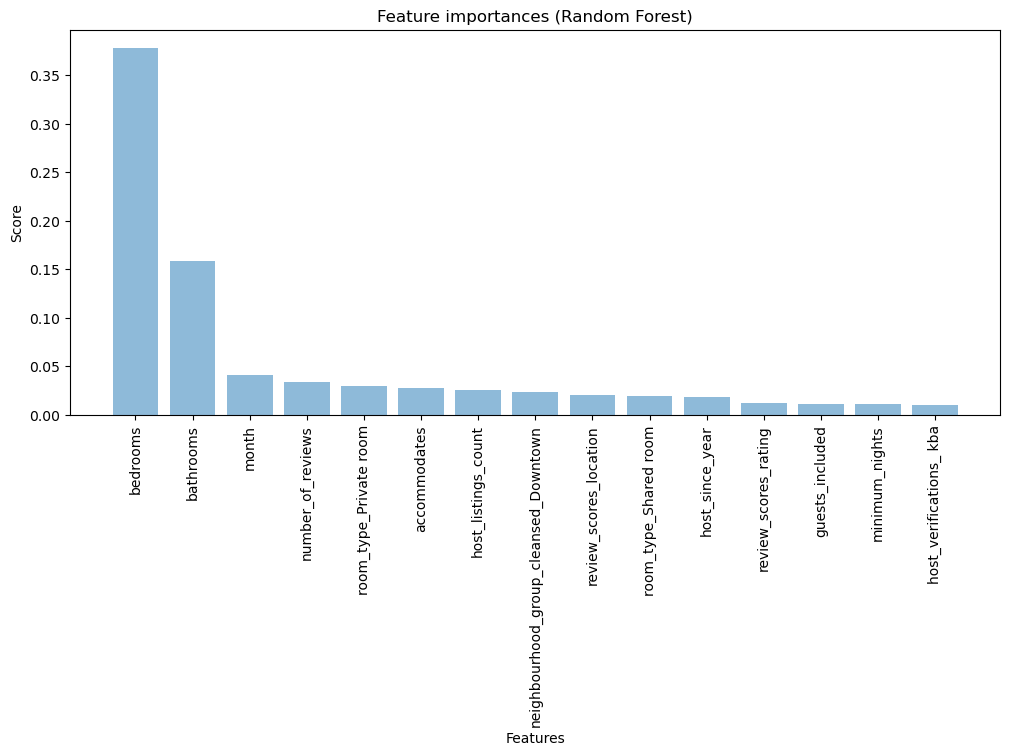

In [141]:
#get feature importances from the model
forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)

features = forest_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = forest_feature_importances['score'][:15]

#plot feature importances
plt.figure(figsize=(12,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (Random Forest)')

plt.savefig('feature importances RF.png')
 
plt.show()

Let's take a look at the results of the modelling:

 - The modelling also shows us that factors already mentioned above have influence on price: time of the year, location, number of bedrooms, bathrooms, beds and accomodates;
 - The host qualities are important: number of host's listings, number of years since being the host, time in which the host responds to the inquiries;
 - The pricing might depend on reviews: number of reviews and review scores.

## Conclusion

In this analysis we try to understand what influences booking prices with the help of AirBnB data for Seattle. Of course, the results may be different for each city, but the current approach can still be used for data from other cities.

Key findings from the Seattle data analysis include:
The basic characteristics of the place (number of rooms, bathrooms, beds and accommodations) affect the price of the reservation.
Host qualities and the number of reviews and review scores can also affect the booking price. So if you want to save money, you can, for example, look for places with less reviews. This will help you find places with the same characteristics (bathrooms, bedrooms, location, etc.) and with a lower booking price.

So now that we know how to choose between the places offered by AirBnB and save money, it's time to travel and test it in practice!